<a href="https://colab.research.google.com/github/Piskovskytom/DatovaVeda/blob/main/HW_week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Diffusion

Credits go to **Pedro Cuenca, Patrick von Platen, Suraj Patil, Jeremy Howard** for creating this notebook, check their whole course if you want to: https://course.fast.ai/Lessons/lesson9.html

In [ ]:
!pip install -Uq diffusers transformers fastcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.7 MB/s eta 0:00:00


## Using Stable Diffusion

You need to create a Hugging Face token and log in to continue.

In [ ]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from diffusers import StableDiffusionPipeline
from fastcore.all import concat
from huggingface_hub import notebook_login
from PIL import Image

logging.disable(logging.WARNING)

torch.manual_seed(1)
if not (Path.home()/'.cache/huggingface'/'token').exists(): notebook_login()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

### Stable Diffusion Pipeline

[`StableDiffusionPipeline`](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion#diffusers.StableDiffusionPipeline) is an end-to-end [diffusion inference pipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion) that allows you to start generating images with just a few lines of code.

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16).to("cuda")

model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:263: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


Let's use the pipeline to generate our first image:

In [ ]:
prompt = "Bear in a bed"

  0%|          | 0/50 [00:00<?, ?it/s]

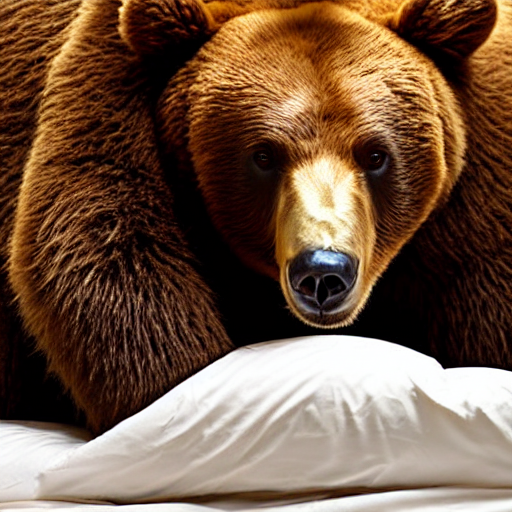

In [ ]:
pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

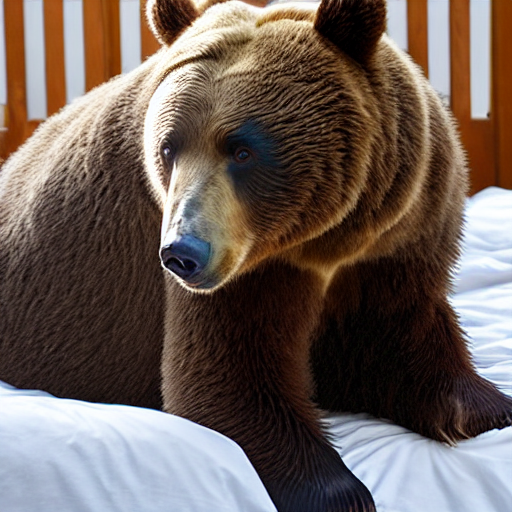

In [ ]:
torch.manual_seed(1024)
pipe(prompt).images[0]

Stable Diffusion is based on a progressive denoising algorithm that is able to create a convincing image starting from pure random noise. We can now look at the intermediary denoising results:

  0%|          | 0/5 [00:00<?, ?it/s]

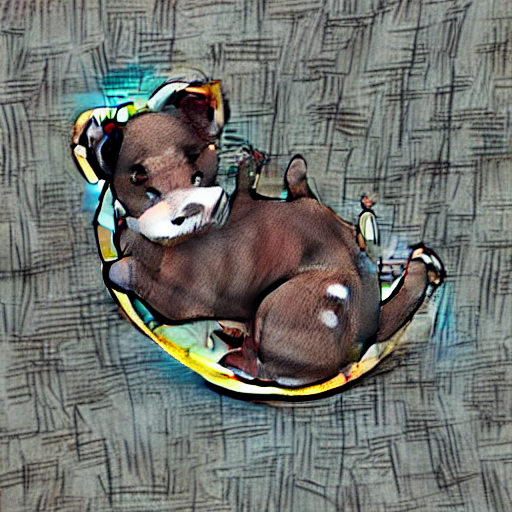

In [ ]:
torch.manual_seed(1024)
pipe(prompt, num_inference_steps=5).images[0]

  0%|          | 0/10 [00:00<?, ?it/s]

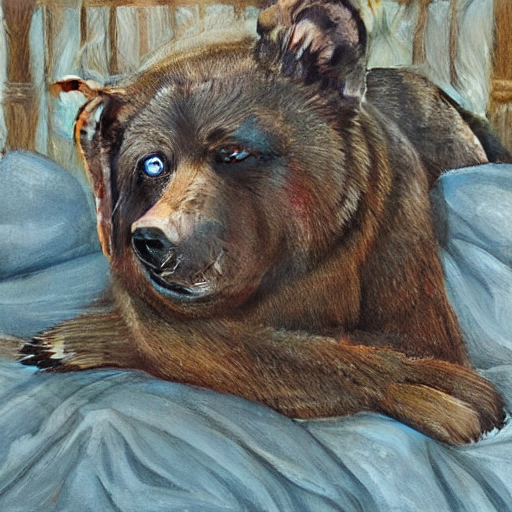

In [ ]:
torch.manual_seed(1024)
pipe(prompt, num_inference_steps=10).images[0]

### Classifier-Free Guidance

In [ ]:
def image_grid(imgs, rows, cols):
    w,h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs): grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

_Classifier-Free Guidance_ is a method to increase the adherence of the output to the conditioning signal we used (the text).

Roughly speaking, the larger the guidance the more the model tries to represent the text prompt. However, large values tend to produce less diversity. The default is `7.5`, which represents a good compromise between variety and fidelity.

We can generate multiple images for the same prompt by simply passing a list of prompts instead of a string.

In [ ]:
num_rows,num_cols = 4,4
prompts = [prompt] * num_cols

In [ ]:
images = concat(pipe(prompts, guidance_scale=g).images for g in [1.1,3,7,14])

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
image_grid(images, rows=num_rows, cols=num_cols)

### Negative prompts

_Negative prompting_ refers to the use of another prompt (instead of a completely unconditioned generation), and scaling the difference between generations of that prompt and the conditioned generation.

  0%|          | 0/50 [00:00<?, ?it/s]

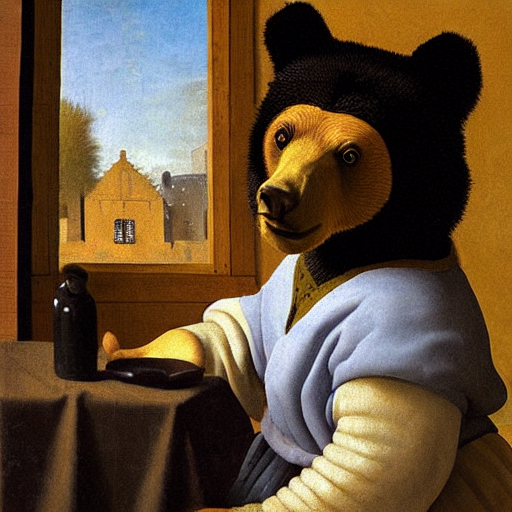

In [ ]:
torch.manual_seed(1000)
prompt = "Bear in the style of Vermeer"
pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

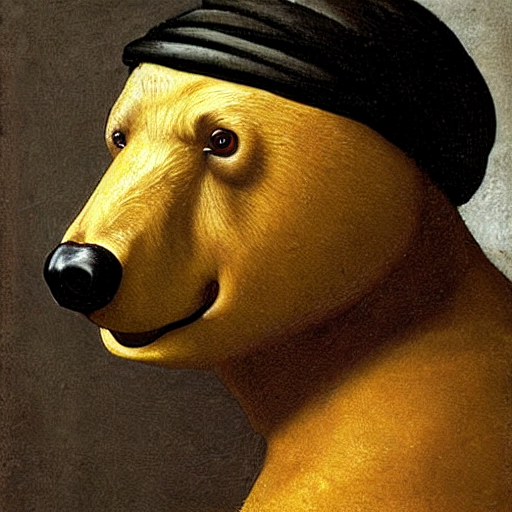

In [ ]:
torch.manual_seed(1000)
pipe(prompt, negative_prompt="blue").images[0]

By using the negative prompt we move more towards the direction of the positive prompt, effectively reducing the importance of the negative prompt in our composition.

### Image to Image

Even though Stable Diffusion was trained to generate images, and optionally drive the generation using text conditioning, we can use the raw image diffusion process for other tasks.

For example, instead of starting from pure noise, we can start from an image an add a certain amount of noise to it. We are replacing the initial steps of the denoising and pretending our image is what the algorithm came up with. Then we continue the diffusion process from that state as usual.

This usually preserves the composition although details may change a lot.

These operations (provide an initial image, add some noise to it and run diffusion from there) can be automatically performed by a special image to image pipeline: `StableDiffusionImg2ImgPipeline`.

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline
from fastdownload import FastDownload

In [ ]:
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16",
    torch_dtype=torch.float16,
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

We'll use as an example an image from Wikipedia.

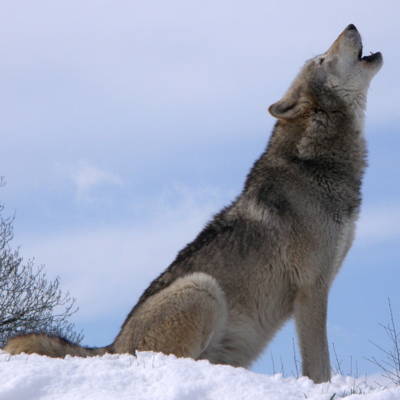

In [ ]:
p = FastDownload().download('https://upload.wikimedia.org/wikipedia/commons/f/f5/Howlsnow.jpg')
init_image = Image.open(p).convert("RGB").resize((400, 400))
init_image

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_img2img.py:596: FutureWarning: You have passed 3 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/40 [00:00<?, ?it/s]

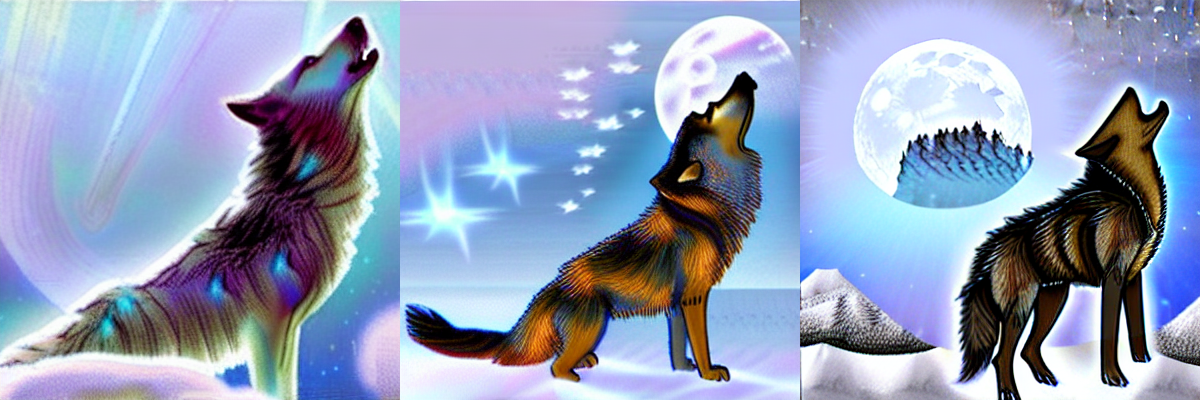

In [ ]:
torch.manual_seed(42)
prompt = "Wolf howling at the moon, fantasy style"
images = pipe(prompt=prompt, num_images_per_prompt=3, image=init_image, strength=0.8, num_inference_steps=50).images
image_grid(images, rows=1, cols=3)

When we get a composition we like we can use it as the next seed for another prompt and further change the results. For example, let's take the second image above and try to use it to generate something in the style of Van Gogh.

In [ ]:
init_image = images[1]

  0%|          | 0/70 [00:00<?, ?it/s]

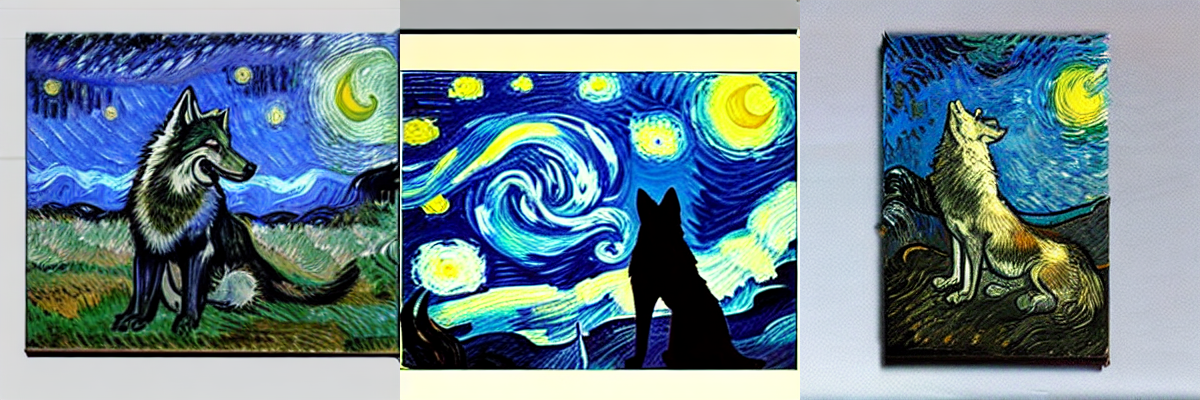

In [ ]:
torch.manual_seed(100)
prompt = "Oil painting of wolf howling at the moon by van Gogh"
images = pipe(prompt=prompt, num_images_per_prompt=3, image=init_image, strength=1, num_inference_steps=70).images
image_grid(images, rows=1, cols=3)

### Fine-tuning

[Making text-to-pokemon model](https://lambdalabs.com/blog/how-to-fine-tune-stable-diffusion-how-we-made-the-text-to-pokemon-model-at-lambda/)

---

## Looking inside the pipeline

The inference pipeline is just a small piece of code that plugs the components together and performs the inference loop.

We'll go through the process of loading and plugging the pieces to see how we could have written it ourselves. We'll start by loading all the modules that we need from their pretrained weights.

First, we need the text encoder and the tokenizer. These come from the text portion of a standard CLIP model, so we'll use the weights released by Open AI.

In [ ]:
from transformers import CLIPTextModel, CLIPTokenizer

In [ ]:
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14", torch_dtype=torch.float16)
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14", torch_dtype=torch.float16).to("cuda")

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

Next we'll load the `autoencoder` and the `unet`.

In [ ]:
from diffusers import AutoencoderKL, UNet2DConditionModel

In [ ]:
vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-ema", torch_dtype=torch.float16).to("cuda")
unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet", torch_dtype=torch.float16).to("cuda")

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

In real diffusion process, people don't add the noise to the training samples just randomly, but it's based on something called a `scheduler`.

The higher value of timestep means that we add more noise, and the Beta says what amount of noise we are really adding.

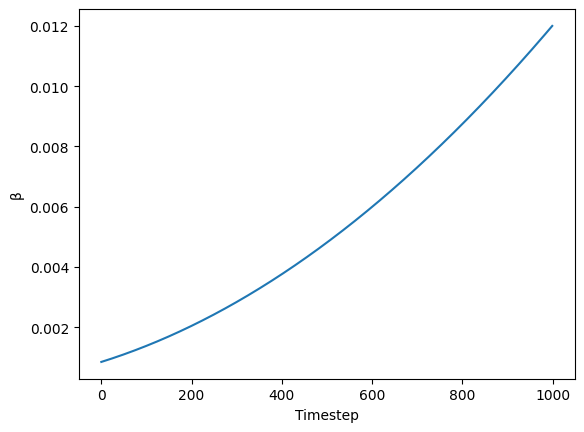

In [ ]:
beta_start,beta_end = 0.00085,0.012
plt.plot(torch.linspace(beta_start**0.5, beta_end**0.5, 1000) ** 2)
plt.xlabel('Timestep')
plt.ylabel('β');

In [ ]:
from diffusers import LMSDiscreteScheduler

In [ ]:
scheduler = LMSDiscreteScheduler(beta_start=beta_start, beta_end=beta_end, beta_schedule="scaled_linear", num_train_timesteps=1000)

We now define the parameters we'll use for generation.

In contrast with the previous examples, we set `num_inference_steps` to 70 to get an even more defined image.

In [ ]:
prompt = ["Bear in a bed"]

height = 512
width = 512
num_inference_steps = 70
guidance_scale = 7.5
batch_size = 1

We tokenize the prompt. The model requires the same number of tokens for every prompt, so padding is used to ensure we meet the required length.

In [ ]:
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
text_input['input_ids']

tensor([[49406,  4298,   530,   320,  2722, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407]])

In [ ]:
tokenizer.decode(49407)

'<|endoftext|>'

The attention mask uses zero to represent tokens we are not interested in. These are all of the padding tokens.

In [ ]:
text_input['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]])

The text encoder gives us the embeddings for the text prompt we used.

In [ ]:
text_embeddings = text_encoder(text_input.input_ids.to("cuda"))[0].half()
text_embeddings.shape

torch.Size([1, 77, 768])

We also get the embeddings required to perform unconditional generation, which is achieved with an empty string: the model is free to go in whichever direction it wants as long as it results in a reasonably-looking image. These embeddings will be applied to apply classifier-free guidance.

In [ ]:
max_length = text_input.input_ids.shape[-1]
uncond_input = tokenizer(
    [""], padding="max_length", max_length=max_length, return_tensors="pt"
)
uncond_embeddings = text_encoder(uncond_input.input_ids.to("cuda"))[0].half()
uncond_embeddings.shape

torch.Size([1, 77, 768])

For classifier-free guidance, we need to do two forward passes. One with the conditioned input (`text_embeddings`), and another with the unconditional embeddings (`uncond_embeddings`). In practice, we can concatenate both into a single batch to avoid doing two forward passes.

In [ ]:
text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

To start the denoising process, we start from pure Gaussian (normal) noise. These are our initial latents.

In [ ]:
torch.manual_seed(100)
latents = torch.randn((batch_size, unet.in_channels, height // 8, width // 8))
latents = latents.to("cuda").half() # using half to get lower precision to make it faster
latents.shape

<ipython-input-27-32ae3cbc9111>:2: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  latents = torch.randn((batch_size, unet.in_channels, height // 8, width // 8))


torch.Size([1, 4, 64, 64])

`4×64×64` is the input shape. The decoder will later transform this latent representation into a `3×512×512` image after the denoising process is complete.

Next, we initialize the scheduler with our chosen `num_inference_steps`. This will prepare the internal state to be used during denoising.

In [ ]:
scheduler.set_timesteps(num_inference_steps)

We scale the initial noise by the standard deviation required by the scheduler. This value will depend on the particular scheduler we use.

In [ ]:
latents = latents * scheduler.init_noise_sigma # because of activations and gradients to not get out of control

We are ready to write the denoising loop. The timesteps go from `999` to `0` (1000 steps that were used during training) following a particular schedule.

In [ ]:
scheduler.timesteps

tensor([999.0000, 984.5217, 970.0435, 955.5652, 941.0870, 926.6087, 912.1304,
        897.6522, 883.1739, 868.6957, 854.2174, 839.7391, 825.2609, 810.7826,
        796.3043, 781.8261, 767.3478, 752.8696, 738.3913, 723.9130, 709.4348,
        694.9565, 680.4783, 666.0000, 651.5217, 637.0435, 622.5652, 608.0870,
        593.6087, 579.1304, 564.6522, 550.1739, 535.6957, 521.2174, 506.7391,
        492.2609, 477.7826, 463.3044, 448.8261, 434.3478, 419.8696, 405.3913,
        390.9131, 376.4348, 361.9565, 347.4783, 333.0000, 318.5217, 304.0435,
        289.5652, 275.0869, 260.6087, 246.1304, 231.6522, 217.1739, 202.6956,
        188.2174, 173.7391, 159.2609, 144.7826, 130.3044, 115.8261, 101.3478,
         86.8696,  72.3913,  57.9130,  43.4348,  28.9565,  14.4783,   0.0000])

In [ ]:
scheduler.sigmas # actual number of noise

tensor([14.6146, 13.3974, 12.3033, 11.3184, 10.4301,  9.6279,  8.9020,  8.2443,
         7.6472,  7.1044,  6.6102,  6.1594,  5.7477,  5.3709,  5.0258,  4.7090,
         4.4178,  4.1497,  3.9026,  3.6744,  3.4634,  3.2680,  3.0867,  2.9183,
         2.7616,  2.6157,  2.4794,  2.3521,  2.2330,  2.1213,  2.0165,  1.9180,
         1.8252,  1.7378,  1.6552,  1.5771,  1.5031,  1.4330,  1.3664,  1.3030,
         1.2427,  1.1852,  1.1302,  1.0776,  1.0272,  0.9788,  0.9324,  0.8876,
         0.8445,  0.8029,  0.7626,  0.7236,  0.6858,  0.6490,  0.6131,  0.5781,
         0.5438,  0.5102,  0.4770,  0.4443,  0.4118,  0.3795,  0.3470,  0.3141,
         0.2805,  0.2455,  0.2084,  0.1672,  0.1174,  0.0292,  0.0000])

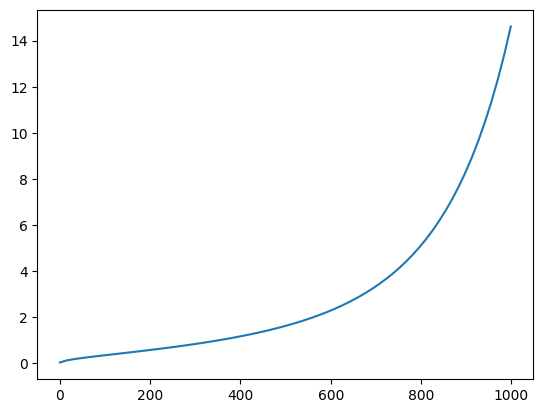

In [ ]:
plt.plot(scheduler.timesteps, scheduler.sigmas[:-1]);

In [ ]:
from tqdm.auto import tqdm

In [ ]:
for i, t in enumerate(tqdm(scheduler.timesteps)):
    input = torch.cat([latents] * 2)
    input = scheduler.scale_model_input(input, t)

    # predict the noise residual
    with torch.no_grad(): pred = unet(input, t, encoder_hidden_states=text_embeddings).sample

    # perform guidance
    pred_uncond, pred_text = pred.chunk(2)
    pred = pred_uncond + guidance_scale * (pred_text - pred_uncond)

    # compute the "previous" noisy sample
    latents = scheduler.step(pred, t, latents).prev_sample

  0%|          | 0/70 [00:00<?, ?it/s]

After this process complets our `latents` contain the denoised representation of the image. We use the `vae` decoder to convert it back to pixel space.

In [ ]:
with torch.no_grad(): image = vae.decode(1 / 0.18215 * latents).sample # scaling based on the original paper

And finally, let's convert the image to PIL so we can display it.

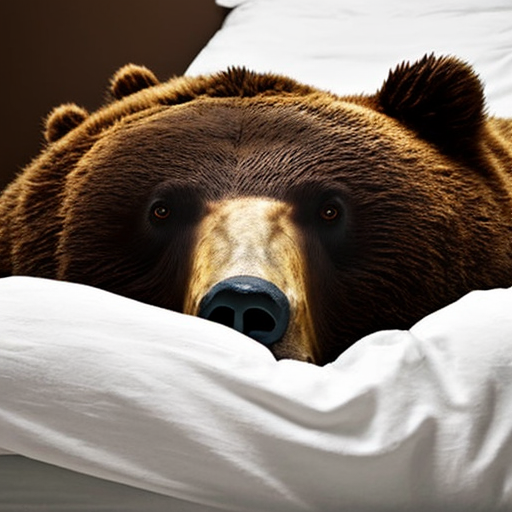

In [ ]:
image = (image / 2 + 0.5).clamp(0, 1)
image = image[0].detach().cpu().permute(1, 2, 0).numpy()
image = (image * 255).round().astype("uint8")
Image.fromarray(image)



---



## TODO

Adjust the following code to generate images not only based on the guidance prompt, but similarly as in section 'Negative prompt' to consider the *negative prompt*. The model will now not scale between *guided image* and *random image*, but between *guided image* and *negatively guided image*.

The following code is the same as the one we've just went through, but it's in functions to make it nice and readable.

In [ ]:
from IPython.display import display

In [ ]:
prompts = [
    'Bear in a bed',
    'Oil painting of a bear in a bed'
]

neg_prompts = [
    'yellow',
    'orange'
]

In [ ]:
def text_enc(prompts, maxlen=None):
    if maxlen is None: maxlen = tokenizer.model_max_length
    inp = tokenizer(prompts, padding="max_length", max_length=maxlen, truncation=True, return_tensors="pt")
    return text_encoder(inp.input_ids.to("cuda"))[0].half()

def mk_img(t):
    image = (t/2+0.5).clamp(0,1).detach().cpu().permute(1, 2, 0).numpy()
    return Image.fromarray((image*255).round().astype("uint8"))

In [ ]:
def mk_samples(prompts, neg_prompts, g=5, seed=100, steps=70):
    bs = len(prompts)
    text = text_enc(prompts)
    uncond = text_enc(neg_prompts)
    emb = torch.cat([uncond, text])
    if seed: torch.manual_seed(seed)

    latents = torch.randn((bs, unet.in_channels, height//8, width//8))
    scheduler.set_timesteps(steps)
    latents = latents.to("cuda").half() * scheduler.init_noise_sigma

    for i,ts in enumerate(tqdm(scheduler.timesteps)):
        inp = scheduler.scale_model_input(torch.cat([latents] * 2), ts)
        with torch.no_grad(): u,t = unet(inp, ts, encoder_hidden_states=emb).sample.chunk(2)
        pred = u + g*(t-u)
        latents = scheduler.step(pred, ts, latents).prev_sample

    with torch.no_grad(): return vae.decode(1 / 0.18215 * latents).sample

In [ ]:
images = mk_samples(prompts, neg_prompts)

<ipython-input-46-3072fca32a2a>:8: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  latents = torch.randn((bs, unet.in_channels, height//8, width//8))


  0%|          | 0/70 [00:00<?, ?it/s]

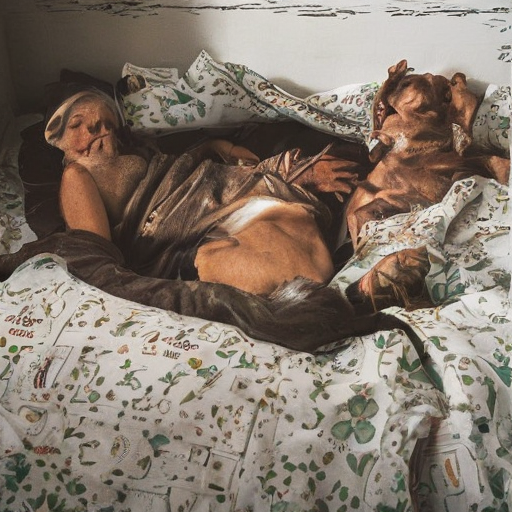

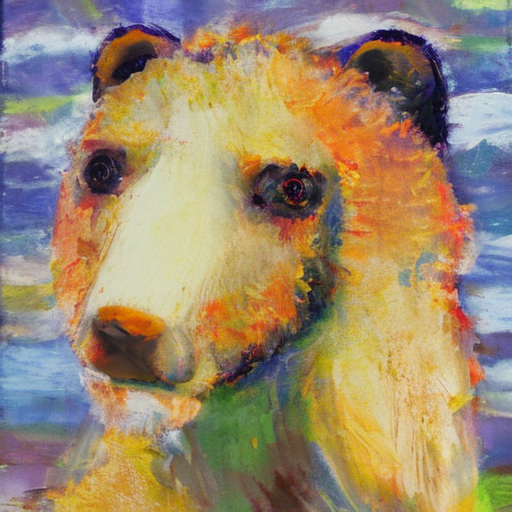

In [ ]:
for img in images: display(mk_img(img))